# Question 1
# Dataset 1 - Iris dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IrisDataset.data", names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

For naive bayes, that compares output using the means of individual columns, and does not compare between different columns for finding the output, scaling of the column data is not necessary.

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
X = df.iloc[:, 0:4]
Y = df.iloc[:, -1]

In [58]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [66]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [68]:
import seaborn as sns

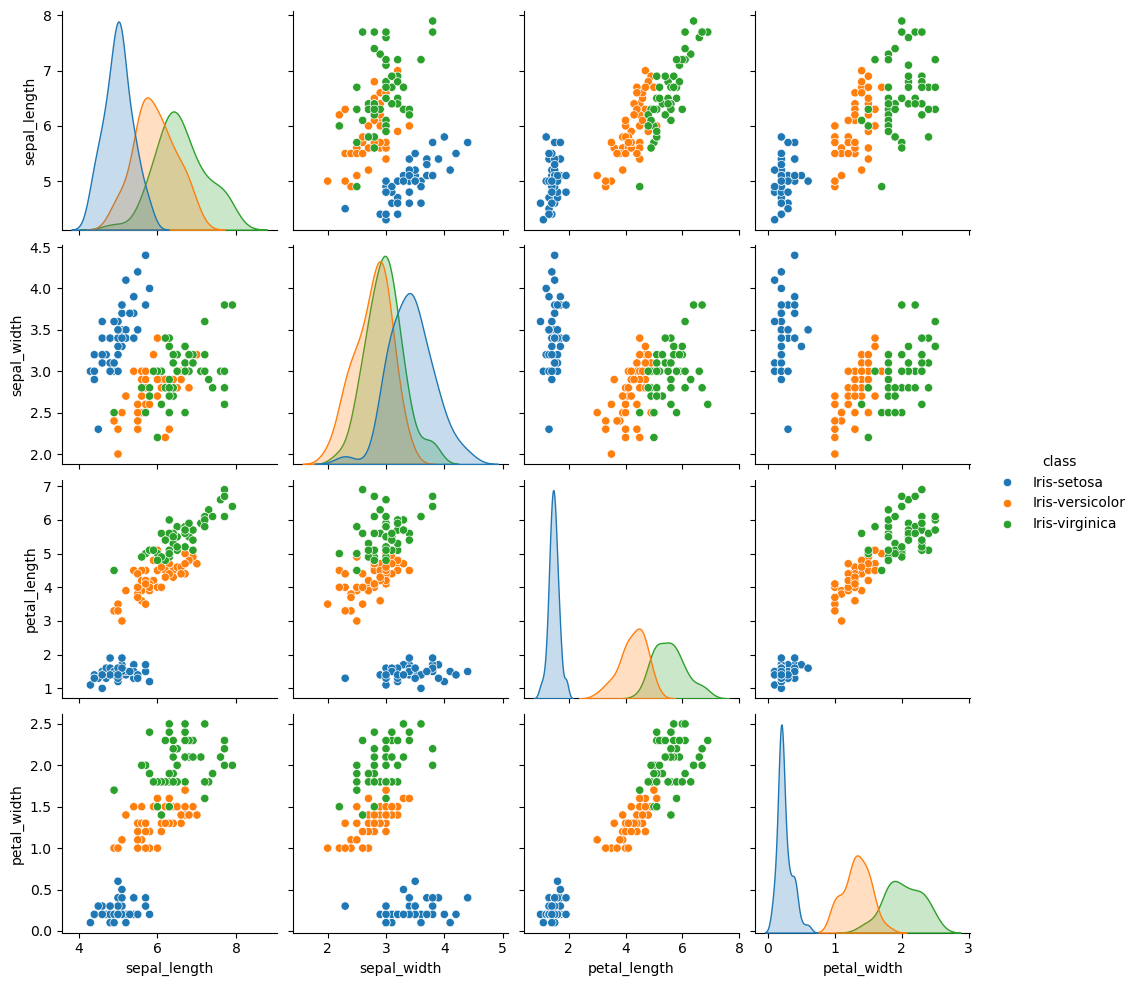

In [70]:
sns.pairplot(df, hue = 'class')

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

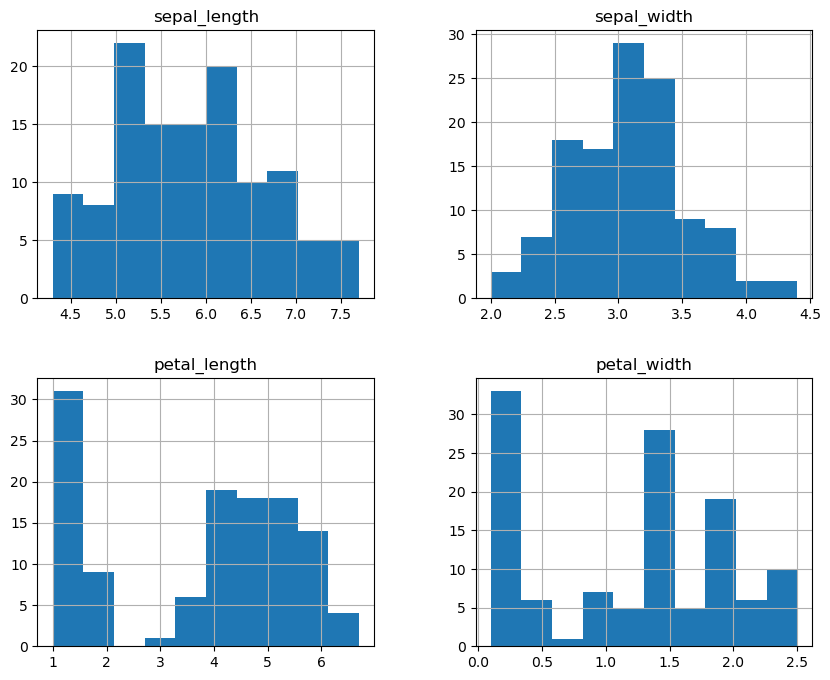

In [71]:
X_train.hist(figsize = (10, 8))

<Axes: xlabel='petal_length', ylabel='Density'>

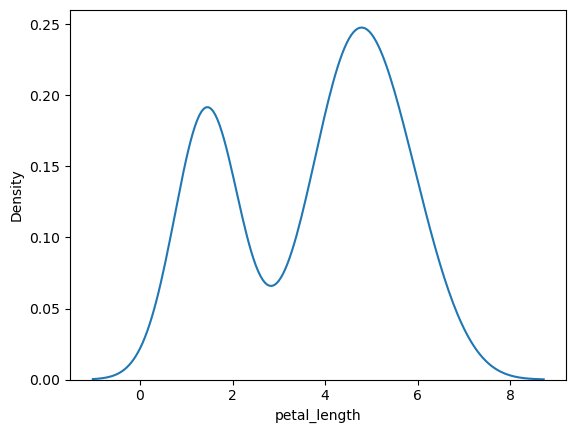

In [72]:
sns.kdeplot(X_train['petal_length'])

<Axes: xlabel='sepal_length', ylabel='Density'>

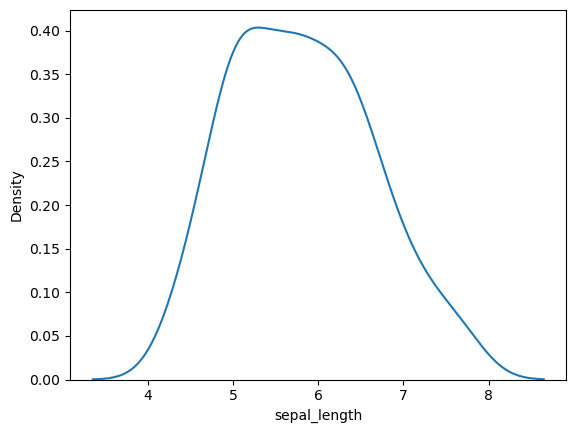

In [73]:
sns.kdeplot(X_train['sepal_length'])

<Axes: xlabel='petal_width', ylabel='Density'>

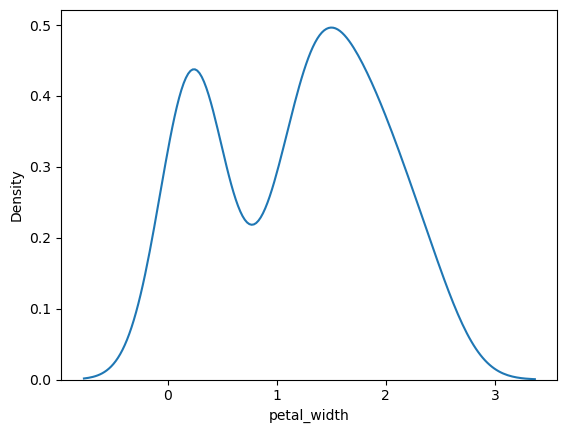

In [78]:
sns.kdeplot(X_train['petal_width'])

<Axes: xlabel='sepal_width', ylabel='Density'>

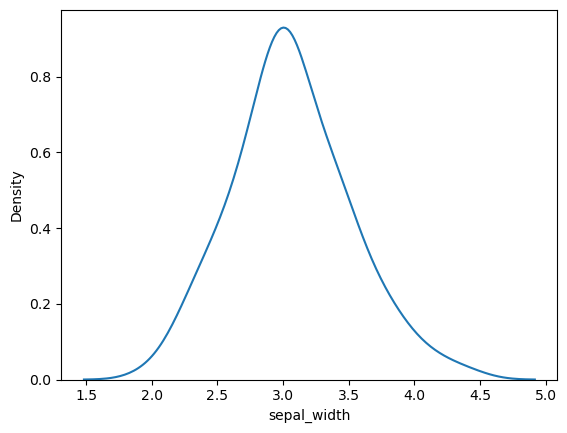

In [84]:
sns.kdeplot(X_train['sepal_width'])

<Axes: ylabel='sepal_length'>

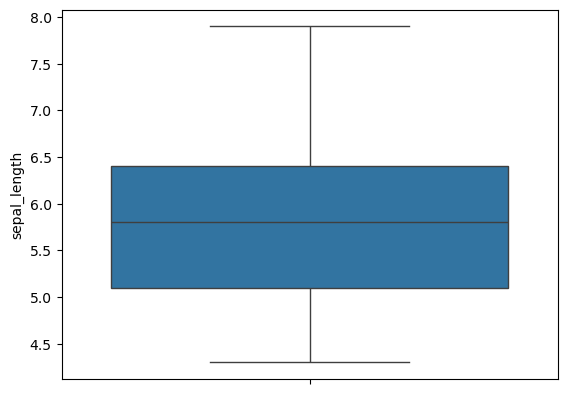

In [186]:
sns.boxplot(data = df['sepal_length'])

<Axes: ylabel='sepal_width'>

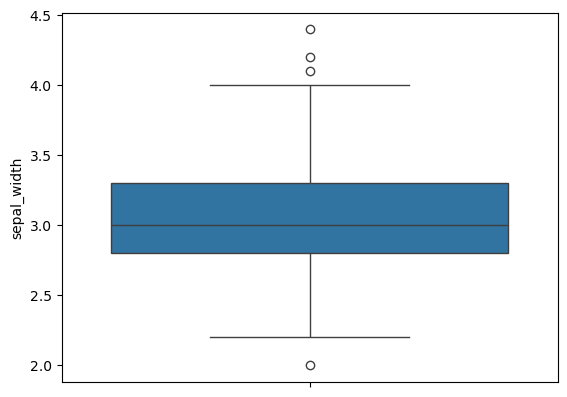

In [192]:
sns.boxplot(data = df['sepal_width'])

<Axes: ylabel='petal_length'>

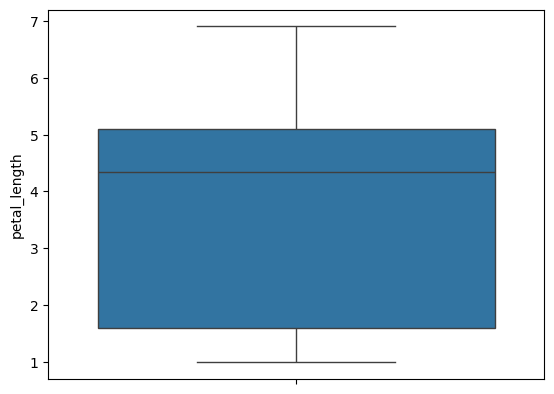

In [194]:
sns.boxplot(data = df['petal_length'])

<Axes: ylabel='petal_width'>

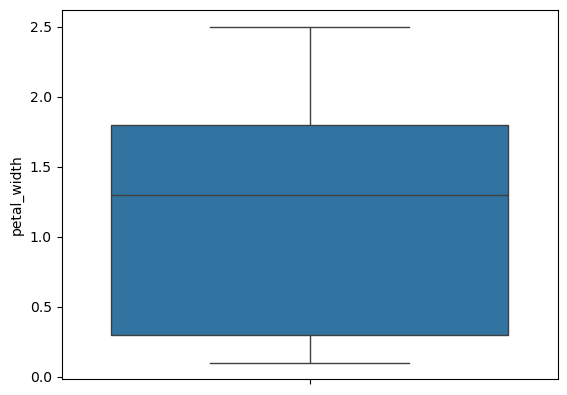

In [196]:
sns.boxplot(data = df['petal_width'])

# Conclusion

<div>It got understood from the graphs, that sepal_width and sepal_length follow gaussial distribution, but the petal_length and the petal_width do not follow gaussial distribution.</div>
<div>It can also be seen that the feature values are not binary. So the binary nb will provide the poorest performance</div>
<div>The feature values are also not discrete but continious, so the multinomial nb will also provide somewhat better but still poor performance.</div>
<div>Since the features are continious in their values, the gaussian nb gives the relatively best results, however, as two columns are non gaussianly distributed, very good performance also cannot be expected from this.</div>
<div>Also it can be seen from the boxplots that the columns sepal_width has outliers, that need to be removed for better performance.</div>

In [218]:
# Removing outliers in the sepal_width column. 
# Keeping only those rows, where the value of the sepal_width column is in the Interquartile Range (IQR)
# The change shall ONLY be made in the training dataset. The training dataset to be used to train the model must be outlier free.
Q1 = X_train['sepal_width'].quantile(0.25)
Q3 = X_train['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

mask = (X_train['sepal_width'] >= (Q1 - 1.5 * IQR)) & (X_train['sepal_width'] <= (Q3 + 1.5 * IQR))
X_train = X_train.loc[mask]
Y_train = Y_train.loc[X_train.index]

In [220]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [222]:
GModel = GaussianNB()

In [224]:
GModel.fit(X_train, Y_train)

GaussianNB()

In [226]:
y_pred_gaussian = GModel.predict(X_test)

In [228]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [230]:
accuracy_score(Y_test, y_pred_gaussian)

1.0

In [232]:
precision_score(Y_test, y_pred_gaussian, average = 'macro')

1.0

In [234]:
recall_score(Y_test, y_pred_gaussian, average = 'macro')

1.0

In [236]:
f1_score(Y_test, y_pred_gaussian, average = 'macro')

1.0

In [238]:
confusion_matrix(Y_test, y_pred_gaussian)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [240]:
BModel = BernoulliNB()

In [242]:
BModel.fit(X_train, Y_train)

BernoulliNB()

In [244]:
y_pred_bern = BModel.predict(X_test)

In [246]:
accuracy_score(Y_test, y_pred_bern)

0.3

In [248]:
precision_score(Y_test, y_pred_bern, average = 'macro')

E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.09999999999999999

In [250]:
recall_score(Y_test, y_pred_bern, average = 'macro')

0.3333333333333333

In [252]:
confusion_matrix(Y_test, y_pred_bern)

array([[ 0, 10,  0],
       [ 0,  9,  0],
       [ 0, 11,  0]], dtype=int64)

In [254]:
f1_score(Y_test, y_pred_bern, average = 'macro')

0.15384615384615385

In [256]:
MModel = MultinomialNB()

In [258]:
MModel.fit(X_train, Y_train)

MultinomialNB()

In [260]:
y_pred_multi = MModel.predict(X_test)

In [262]:
accuracy_score(Y_test, y_pred_multi)

0.9666666666666667

In [264]:
precision_score(Y_test, y_pred_multi, average = 'macro')

0.9666666666666667

In [266]:
recall_score(Y_test, y_pred_multi, average = 'macro')

0.9696969696969697

In [268]:
f1_score(Y_test, y_pred_multi, average = 'macro')

0.9665831244778612

In [270]:
confusion_matrix(Y_test, y_pred_multi)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

In [272]:
from sklearn.model_selection import cross_val_score

In [274]:
cross_val_score(GModel, X, Y, cv = 10, scoring='accuracy')

array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

In [276]:
GScore = cross_val_score(GModel, X, Y, cv = 10, scoring = 'accuracy')

In [278]:
BScore = cross_val_score(BModel, X, Y, cv = 10, scoring = 'accuracy')

In [280]:
MScore = cross_val_score(MModel, X, Y, cv = 10, scoring = 'accuracy')

In [282]:
print("Average accuracy of the Binomial NB model is ", BScore.mean())
print("Average accuracy of the Multinomial model is ", MScore.mean())
print("Average accuracy of the Gaussial model is ", GScore.mean())

Average accuracy of the Binomial NB model is  0.33333333333333337
Average accuracy of the Multinomial model is  0.9533333333333334
Average accuracy of the Gaussial model is  0.9533333333333334


# Question 2
# Dataset 1 - Iris Dataset

<div>Decision Tree classifier shall be used now.</div>
<div>Now, the DT Classifier is based on many many if-else conditional statements, and thus, there is chances of overfitting, so the depth of the tree should be kept in an optimal positioning, and should not be made too deep, neither it should be very small which increases the chances of underfitting.</div>
<div>Since this is a conditional classifier, using Decision trees for single tree or for using an ensemble of decision trees (random forest), scaling the data is not necessary.</div>

Since the DT is based on conditional statements, the output or the result of this classifier will be the best among all the classifiers that has been used for this dataset till now.

From the naive_bayes question on this dataset, all the outliers present in the sepal_width column has been removed. To check it once

<Axes: ylabel='sepal_width'>

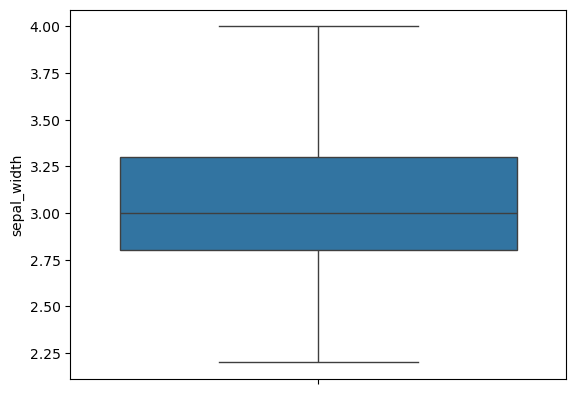

In [287]:
sns.boxplot(X_train['sepal_width'])

In [289]:
from sklearn.tree import DecisionTreeClassifier

In [291]:
dt = DecisionTreeClassifier()

In [293]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [295]:
y_pred_dt = dt.predict(X_test)

In [299]:
accuracy_score(Y_test, y_pred_dt)

1.0

In [303]:
precision_score(Y_test, y_pred_dt, average = 'macro')

1.0

In [305]:
f1_score(Y_test, y_pred_dt, average = 'macro')

1.0

In [307]:
recall_score(Y_test, y_pred_dt, average='macro')

1.0

In [311]:
confusion_matrix(Y_test, y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [313]:
DTScore = cross_val_score(dt, X, Y, cv = 10, scoring = 'accuracy')

In [315]:
print("The average accuracy score for the Decision Tree model is ", DTScore.mean())

The average accuracy score for the Decision Tree model is  0.96


Higher than all the previous models used in this dataset

#### Hyperparameter tuning

In [328]:
dt1 = DecisionTreeClassifier(max_depth=5, min_samples_split=5, criterion='entropy')
dt1.fit(X_train, Y_train)
cross_val_score(dt1, X, Y, cv = 10, scoring = 'accuracy').mean()

0.96

In [362]:
dt2 = DecisionTreeClassifier(max_depth=8, min_samples_split=5, criterion='entropy')
dt2.fit(X_train, Y_train)
cross_val_score(dt2, X, Y, cv = 10, scoring = 'accuracy').mean()

0.96

In [364]:
dt3 = DecisionTreeClassifier(max_depth=10, min_samples_split=2, criterion='entropy')
dt3.fit(X_train, Y_train)
cross_val_score(dt3, X, Y, cv = 10, scoring = 'accuracy').mean()

0.96

In [366]:
dt4 = DecisionTreeClassifier(max_depth=10, min_samples_split=5, criterion='gini')
dt4.fit(X_train, Y_train)
cross_val_score(dt4, X, Y, cv = 10, scoring = 'accuracy').mean()

0.96

In [368]:
from sklearn.model_selection import GridSearchCV

In [370]:
# Using gridSearchCV to find the most optimal hyperparameters

param_list = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

gridSearch = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = param_list, cv = 10, scoring = 'accuracy')

In [374]:
gridSearch.fit(X_train, Y_train)

E:\Anaconda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [376]:
gridSearch.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [378]:
# It can be seen that the best hyperparaeters are
# criterion value should be entropy, max_depth of the tree should be 5,
# min_samples_leaf should be 2 and min_samples_split should be 10. If there are less than 10 leaves in a node, then 
# the node cannot be divided any furthur and it becomes a leaf node.

In [380]:
gridSearch.best_score_

0.9409090909090908

In [382]:
# So the best accuracy that can be obtained for this decision tree model on this dataset (with the outliers, as in the
# datasets X and Y, the outliers were not removed) is 0.94

#### Plotting the Decision Tree

In [385]:
from sklearn.tree import plot_tree

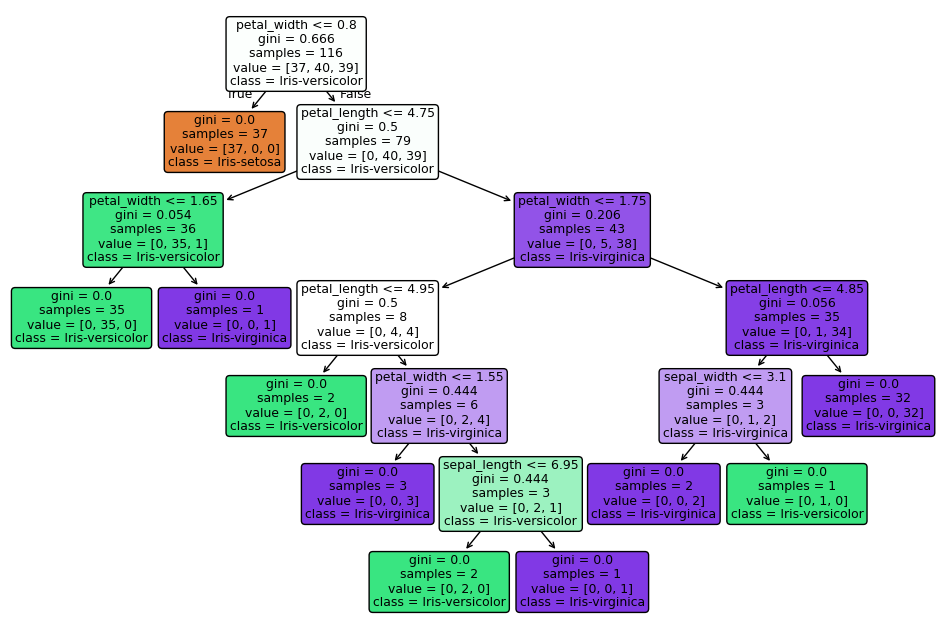

In [393]:
# Plotting the original decision tree with overfitting (dt), where all hyperparameter values are the default values

plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X_train.columns, class_names=dt.classes_, filled=True, rounded=True)
plt.show()

# From the figure it is found out the depth of this tree is 7

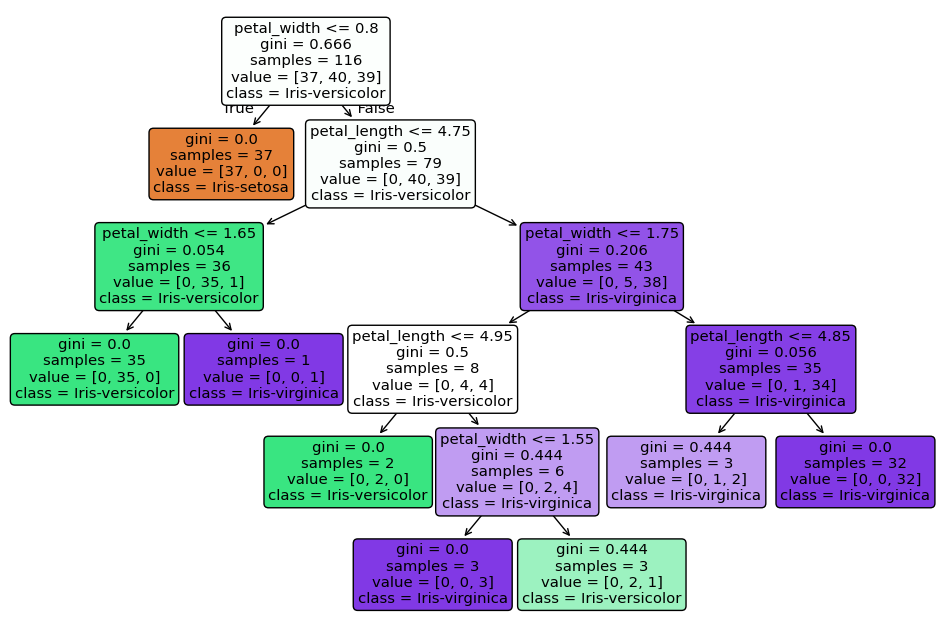

In [395]:
# Plotting the first decision tree with no overfitting

plt.figure(figsize=(12, 8))
plot_tree(dt1, feature_names=X_train.columns, class_names=dt.classes_, filled=True, rounded=True)
plt.show()

In [397]:
# The depth of this tree is 5. 

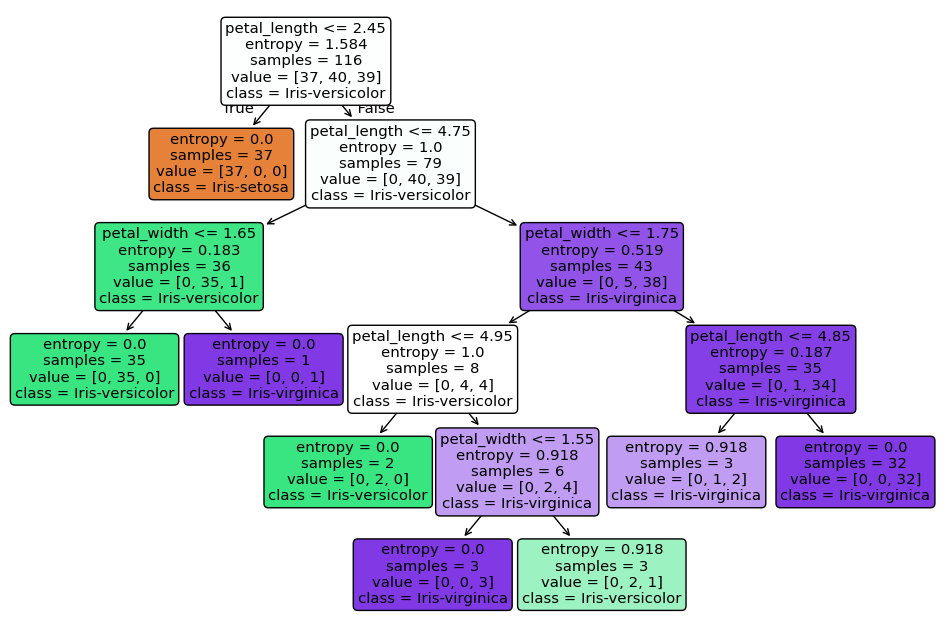

In [399]:
# For the second trial Decision tree

plt.figure(figsize=(12, 8))
plot_tree(dt2, feature_names=X_train.columns, class_names=dt.classes_, filled=True, rounded=True)
plt.show()

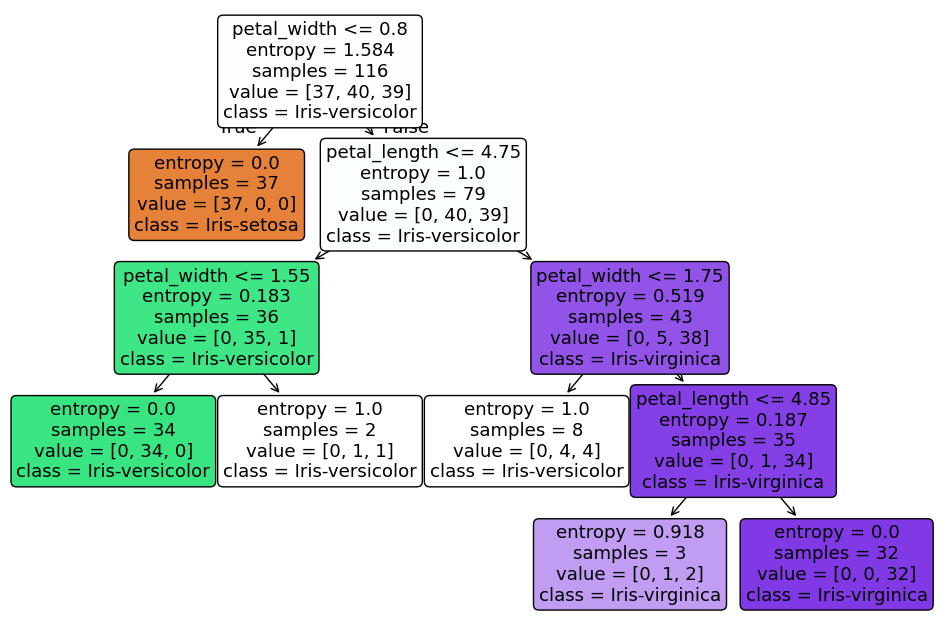

In [403]:
# for the decision tree with the best results, provided by the GridSearchCV
best_tree = gridSearch.best_estimator_

plt.figure(figsize=(12, 8))
plot_tree(best_tree, feature_names=X_train.columns, class_names=dt.classes_, filled=True, rounded=True)
plt.show()

In [407]:
# Here, as provided by the grid_searchCV, the max depth of this Decision tree is 5, and this is the decision tree that 
# gives the best result.

In [411]:
# So, on an average it can be concluded that for processed training data with no outliers, the Decision tree model gives 
# an accuracy score of 0.96, with maximum of 5 depth to prevent overfitting.

# Question 1

# Dataset 1 - Breast Cancer Dataset

In [425]:
df = pd.read_csv('BreastCancer.data', names=["target", "mean radius", "mean texture", "mean perimeter", "mean area", 
    "mean smoothness", "mean compactness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension",
    "radius error", "texture error", "perimeter error", "area error", "smoothness error",
    "compactness error", "concavity error", "concave points error", "symmetry error", "fractal dimension error",
    "worst radius", "worst texture", "worst perimeter", "worst area", "worst smoothness",
    "worst compactness", "worst concavity", "worst concave points", "worst symmetry", "worst fractal dimension"])

In [427]:
df.head()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    object 
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error              

<Axes: ylabel='mean area'>

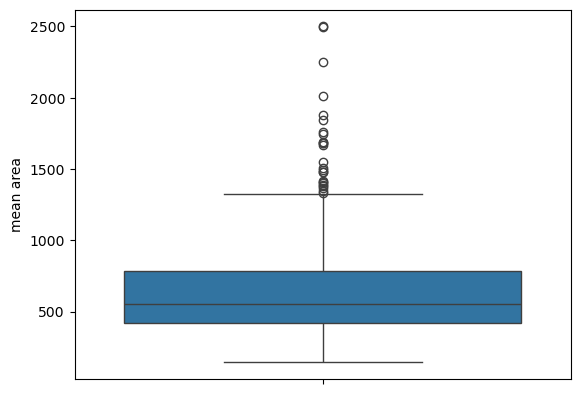

In [441]:
sns.boxplot(df['mean area'])

<Axes: ylabel='mean texture'>

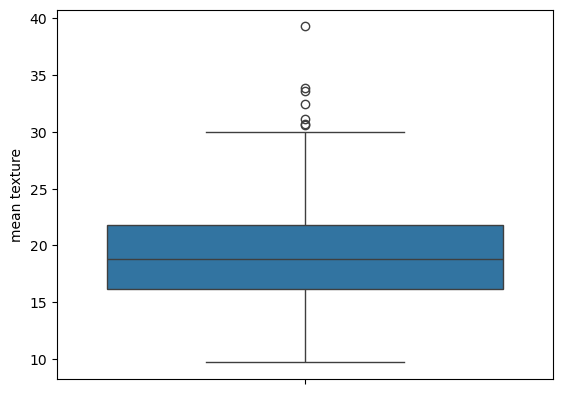

In [443]:
sns.boxplot(df['mean texture'])

<Axes: ylabel='mean perimeter'>

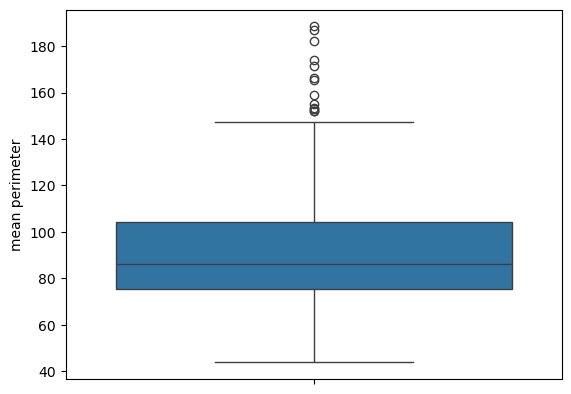

In [445]:
sns.boxplot(df['mean perimeter'])

In [447]:
# There are many outliers present in this dataset. 

X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

In [449]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [451]:
Y.head()

842302      M
842517      M
84300903    M
84348301    M
84358402    M
Name: target, dtype: object

In [495]:
# Removing outliers for all the columns based on the InterQuartile Range (IQR)
# All the columns are taken and one by one the outliers are getitng removed.

for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    
    mask = ((X[col] >= (Q1 - 1.5 * IQR)) & (X[col] <= (Q3 + 1.5 * IQR)))
    
    X = X[mask]
    Y = Y[mask]

In [497]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
8510426,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259
8510653,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,14.50,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183
8510824,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773
855167,13.440,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,...,15.93,30.25,102.50,787.9,0.1094,0.2043,0.20850,0.11120,0.2994,0.07146
857155,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.02749,0.1675,0.06043,...,13.76,20.70,89.88,582.6,0.1494,0.2156,0.30500,0.06548,0.2747,0.08301


In [499]:
Y.head()

8510426    B
8510653    B
8510824    B
855167     M
857155     B
Name: target, dtype: object

In [501]:
# Using the naive bayes.

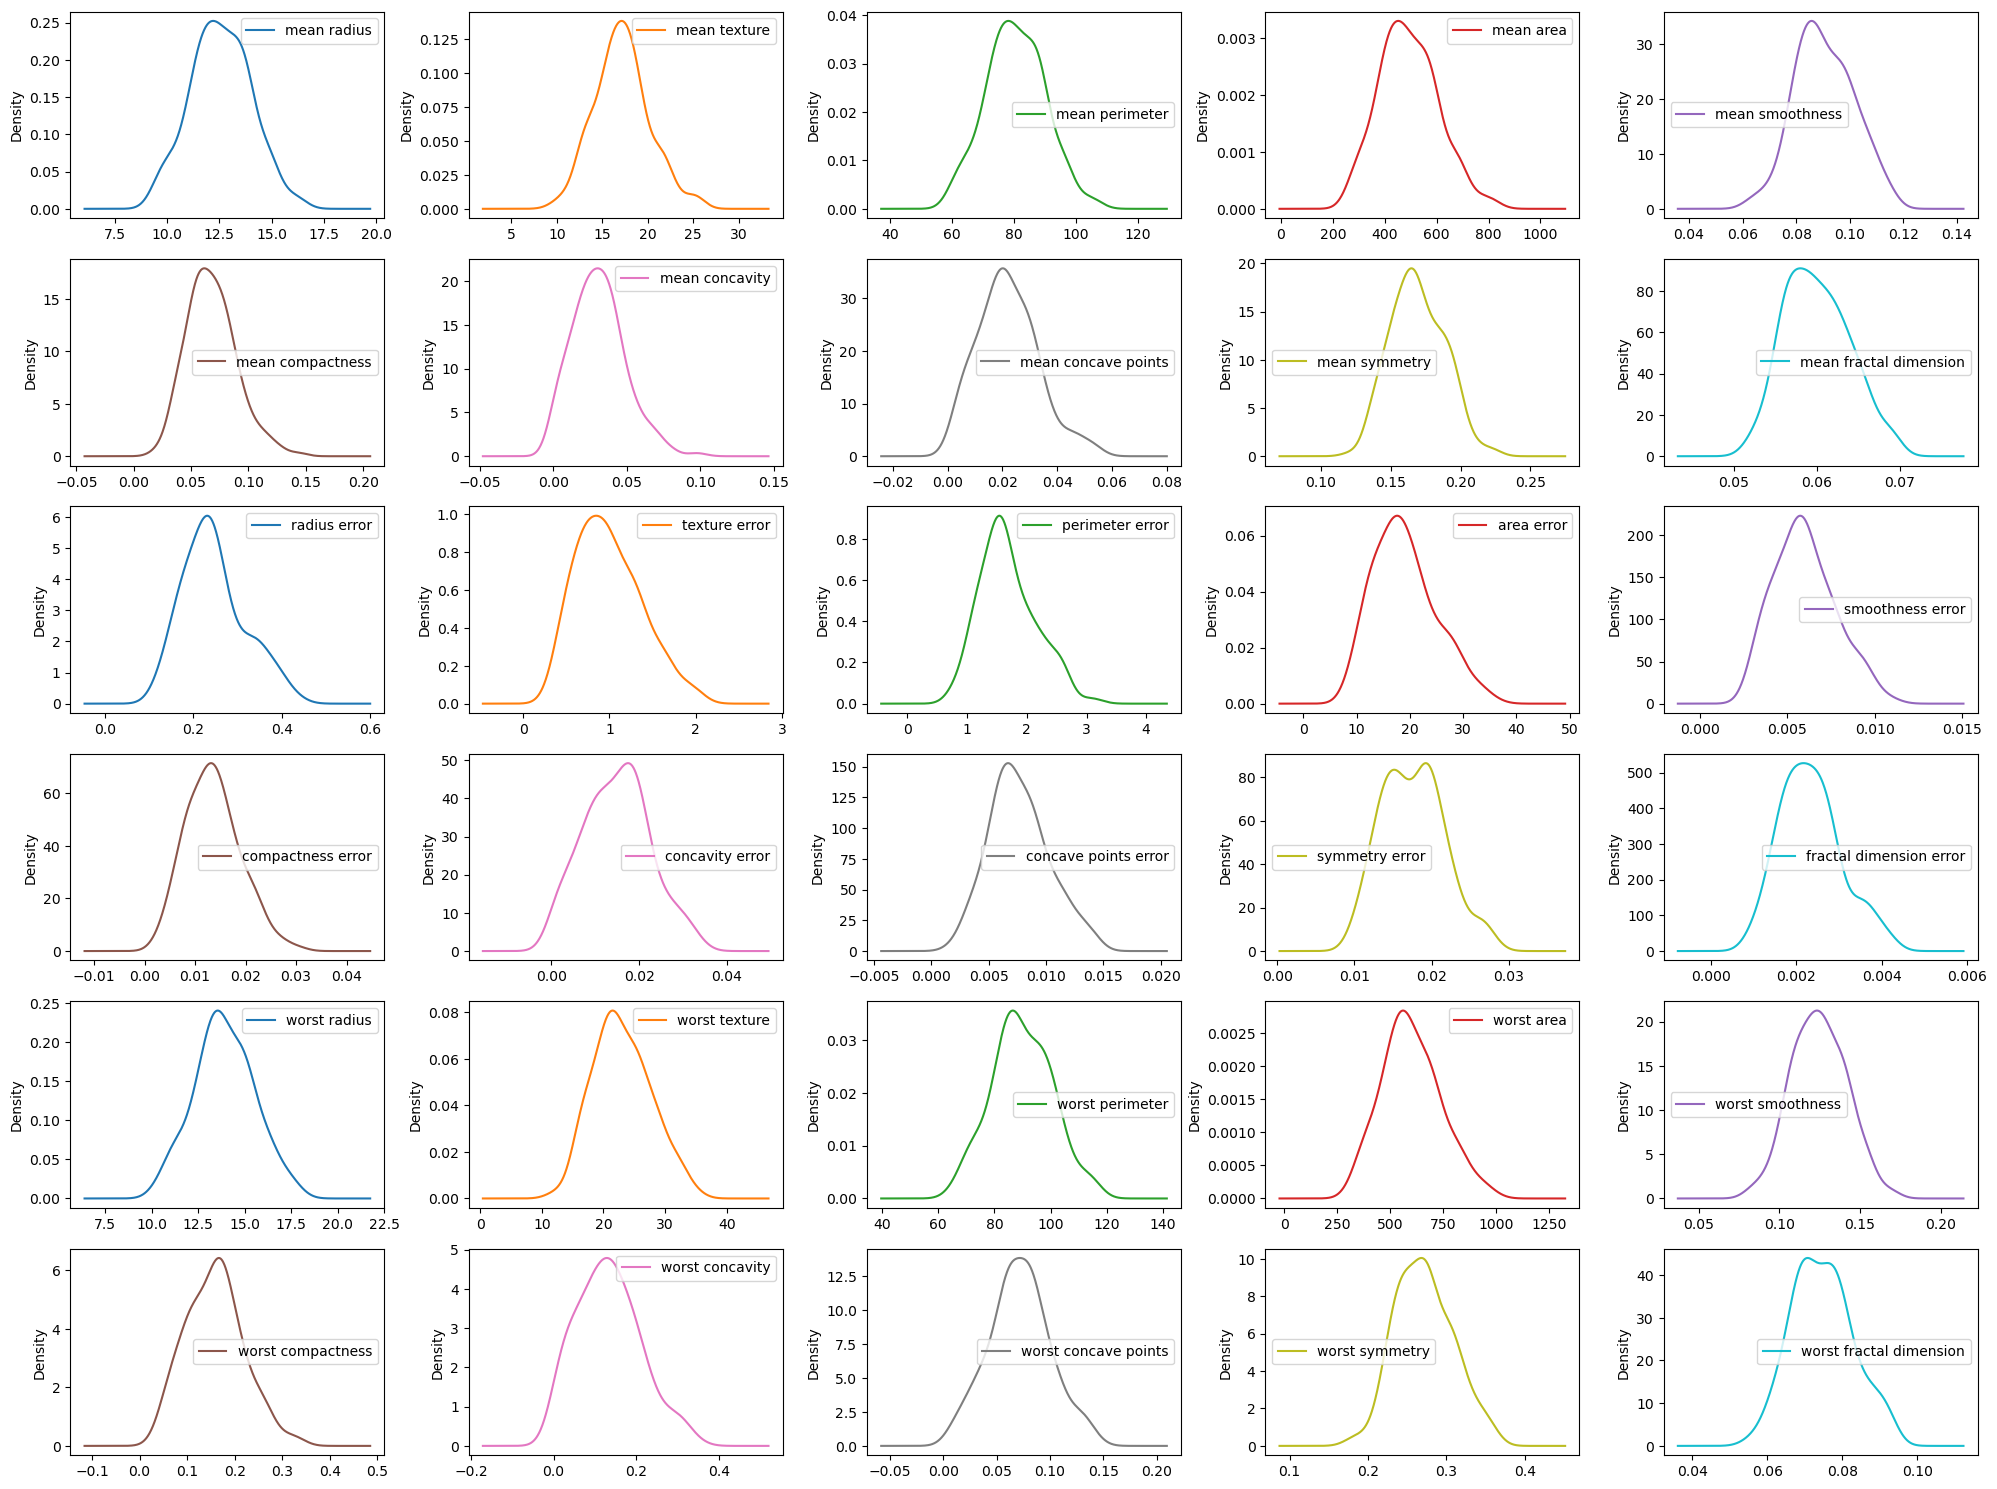

In [503]:
X.plot(kind = 'kde', subplots = True, layout = (6, 5), figsize = (20, 15), sharex = False, sharey = False)
plt.tight_layout()
plt.show()

In [505]:
# It can be easily seen that all the features are normally distributed, and are continious with many values.
# So the bernoulliNB model gives the worst results, then the result somewhat increases for the multinomialNb
# Since all the features are gaussian distributed, the gaussianNb gives the best result among all.

In [507]:
# checking for outliers for some columns (expected there will be none as removal was done)

<Axes: ylabel='mean area'>

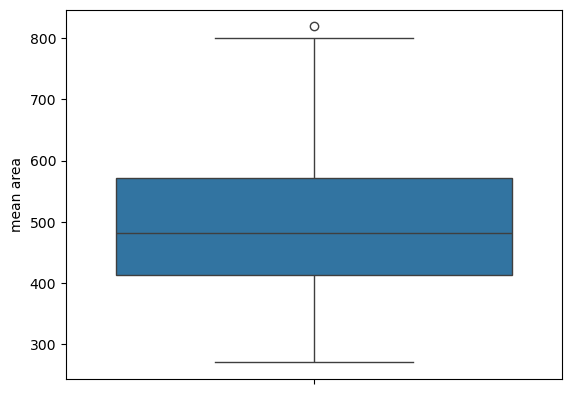

In [509]:
sns.boxplot(X['mean area'])

<Axes: ylabel='mean perimeter'>

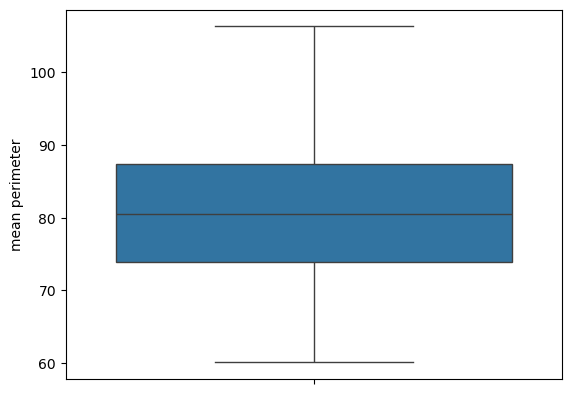

In [511]:
sns.boxplot(X['mean perimeter'])

<Axes: ylabel='mean radius'>

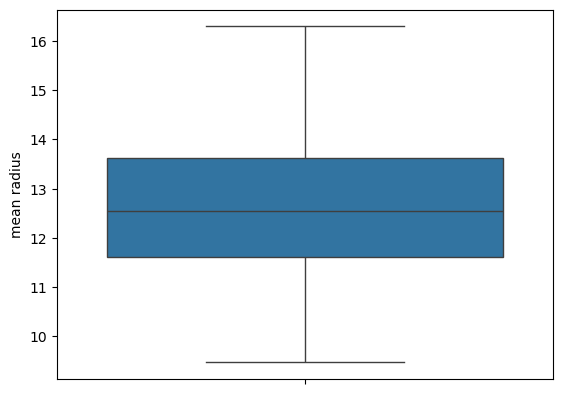

In [513]:
sns.boxplot(X['mean radius'])

In [515]:
# It may be concluded the number of outliers in the data has reduced by a large extent.
# Now scaling is not necessary as naive bayes do not perform comparision between columns, it only compares each column independently
# with the output column.

In [517]:
# train and test data sets are created.

In [519]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [521]:
Bmodel = BernoulliNB()
Bmodel.fit(X_train, Y_train)
y_pred_b = Bmodel.predict(X_test)

In [523]:
accuracy_score(Y_test, y_pred_b)

0.9459459459459459

In [527]:
recall_score(Y_test, y_pred_b, average='macro')

0.5

In [533]:
precision_score(Y_test, y_pred_b, average='macro')

E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.47297297297297297

In [531]:
f1_score(Y_test, y_pred_b, average='macro')

0.4861111111111111

In [535]:
confusion_matrix(Y_test, y_pred_b)

array([[35,  0],
       [ 2,  0]], dtype=int64)

In [539]:
Mmodel = MultinomialNB()
Mmodel.fit(X_train, Y_train)
y_pred_m = Mmodel.predict(X_test)

In [541]:
accuracy_score(Y_test, y_pred_m)

0.9459459459459459

In [543]:
precision_score(Y_test, y_pred_m, average='macro')

E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.47297297297297297

In [545]:
recall_score(Y_test, y_pred_m, average='macro')

0.5

In [547]:
f1_score(Y_test, y_pred_m, average = 'macro')

0.4861111111111111

In [549]:
confusion_matrix(Y_test, y_pred_m)

array([[35,  0],
       [ 2,  0]], dtype=int64)

In [551]:
# Using the Gaussian Nb. Expected to provide the best performance till now

In [553]:
Gmodel = GaussianNB()
Gmodel.fit(X_train, Y_train)
y_pred_g = Gmodel.predict(X_test)

In [555]:
accuracy_score(Y_test, y_pred_g)

0.9459459459459459

In [557]:
precision_score(Y_test, y_pred_g, average='macro')

E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.47297297297297297

In [559]:
recall_score(Y_test, y_pred_g, average='macro')

0.5

In [563]:
f1_score(Y_test, y_pred_g, average = 'macro')

0.4861111111111111

In [565]:
Bscore = cross_val_score(Bmodel, X, Y, cv = 10, scoring = 'accuracy')

E:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [567]:
Mscore = cross_val_score(Mmodel, X, Y, cv = 10, scoring = 'accuracy')

E:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [569]:
Gscore = cross_val_score(Gmodel, X, Y, cv = 10, scoring='accuracy')

E:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [571]:
print("Average accuracy score for the bernoulli model is ", Bscore.mean())
print("Average accuracy score for the Multinomial model is ", Mscore.mean())
print("Average accuracy score for the Gaussian model is ", Gscore.mean())

Average accuracy score for the bernoulli model is  0.9780701754385965
Average accuracy score for the Multinomial model is  0.9780701754385965
Average accuracy score for the Gaussian model is  0.9230994152046785


In [576]:
# Unexpectedly the accuracy score for the bernoulli and the multinomial model is coming to be much much more than the 
# gaussian model, even with all the rows with the outliers removed. Might be because some important rows got removed during
# removing the outliers. It should have been the opposite.

# Question 2
# Dataset 2 - Breast Cancer Dataset

In [583]:
# The dataset is already filtered out of all the outliers during the modelling with Naive bayes.
# Now the model fitting is to be done.
# The accuracy of the Decision Tree model is supposed to be the highest. 
# Again, as the Decision tree is a set of if-else condition statements, the scaling is not required.

In [607]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
y_pred_dt = dtree.predict(X_test)

In [609]:
accuracy_score(Y_test, y_pred_dt)

0.9459459459459459

In [611]:
recall_score(Y_test, y_pred_dt, average='macro')

0.7357142857142858

In [613]:
precision_score(Y_test, y_pred_dt, average='macro')

0.7357142857142858

In [615]:
# So, avove 70% of the predictions are correct predictions and
# and above 70% of the actual values have been correctly predicted

In [617]:
f1_score(Y_test, y_pred_dt, average='macro')

0.7357142857142858

In [619]:
confusion_matrix(Y_test, y_pred_dt)

array([[34,  1],
       [ 1,  1]], dtype=int64)

In [621]:
# So effectively only two data points on the test data set have been incorrectly predicted.
# Rest all the 35 data points are correctly predicted.

In [633]:
# For finding the cross valuation score for final verification

cross_val_score(dtree, X, Y, cv = 10, scoring = 'accuracy')

E:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


array([0.94736842, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.94444444, 0.94444444, 0.94444444, 0.88888889])

In [635]:
cross_val_score(dtree, X, Y, cv = 10, scoring = 'accuracy').mean()

E:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


0.9558479532163743

In [ ]:
# So the accuracy of this decision tree over this breast cancer dataset is 0.95

In [623]:
# This tree is hugely overfitted, with a huge depth.
# The tree is 

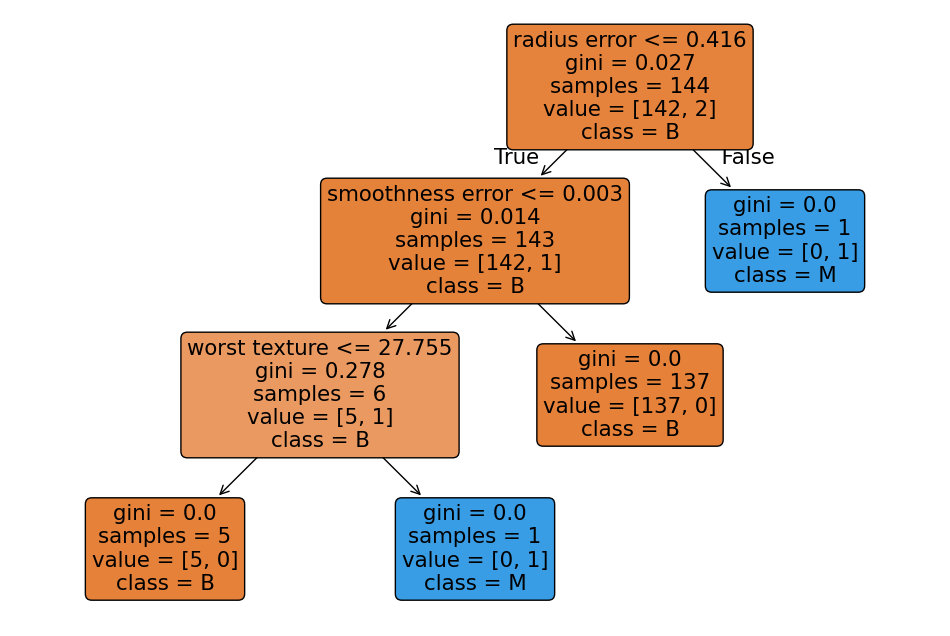

In [627]:
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X_train.columns, class_names=dtree.classes_, filled=True, rounded=True)
plt.show()

In [629]:
# This is the decision tree.
# Now to tweak the parameters

In [631]:
dtree1 = DecisionTreeClassifier(max_depth=4, min_samples_split=6, criterion='entropy')
dtree1.fit(X_train, Y_train)
y_pred_dt1 = dtree1.predict(X_test)

In [639]:
cross_val_score(dtree1, X, Y, cv = 10, scoring='accuracy').mean()

E:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


0.9836257309941521

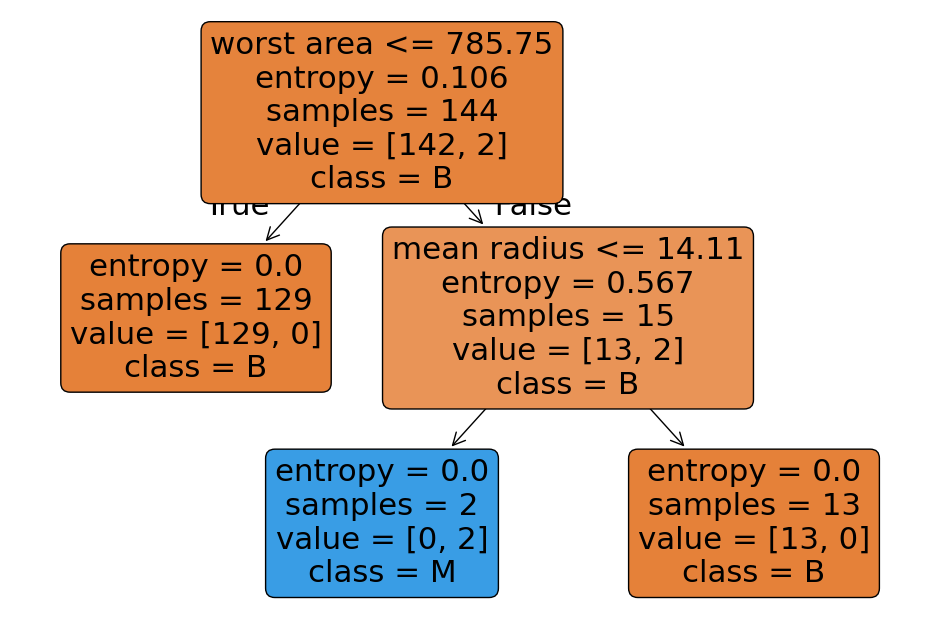

In [645]:
# So the accuracy hugely increased.
# The tree is 

plt.figure(figsize=(12, 8))
plot_tree(dtree1, feature_names=X_train.columns, class_names=dtree.classes_, filled=True, rounded=True)
plt.show()

In [643]:
dtree2 = DecisionTreeClassifier(max_depth=3, min_samples_split=6, criterion='gini')
dtree2.fit(X_train, Y_train)
y_pred_dt2 = dtree2.predict(X_test)
accuracy_score(Y_test, y_pred_dt2)

0.9459459459459459

In [647]:
cross_val_score(dtree2, X, Y, cv = 10, scoring='accuracy').mean()

E:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


0.9725146198830409

In [649]:
# The accuracy decreased, so it hyperperameter tuning is more required.

# To find the best possible hyperparameters to give the best possible decision tree, GridSearchCV is used

In [655]:
params_list = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [3, 4, 5, 6, 7],
    'min_samples_leaf': [2, 3, 4, None],
    'criterion': ['entropy', 'gini']
}

gridSearchModel = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params_list, cv = 10, scoring='accuracy')

In [657]:
gridSearchModel.fit(X_train, Y_train)

E:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
600 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "E:\Anaconda\Lib\site-packages\s

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [2, 3, 4, None],
                         'min_samples_split': [3, 4, 5, 6, 7]},
             scoring='accuracy')

In [660]:
gridSearchModel.best_score_

0.9866666666666667

In [662]:
# So the maximum accuracy score possible for this dataset using the Decision Tree model is 0.98, the highest among
# all the models that were used till now on this dataset.
# So this is the highest possible accuracy score for 0.98

In [664]:
# The best hyperparameters that give this score is 

In [666]:
gridSearchModel.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [670]:
# the max depth must be 2. criterion is 'entropy', splitting cannot happen if after the split a node is created that has
# less than 4 rows, and a node with less than 3 rows cannot be splitted any furthur, 
# EVEN IF the splitting decreases the entropy in the dataset and makes the model better abled to make predictions.
# But, if the model knows everything about the training dataset, it overfits, and this is not desirable for the testing puspose. 

In [672]:
# to get this best tree
best_DTree = gridSearchModel.best_estimator_

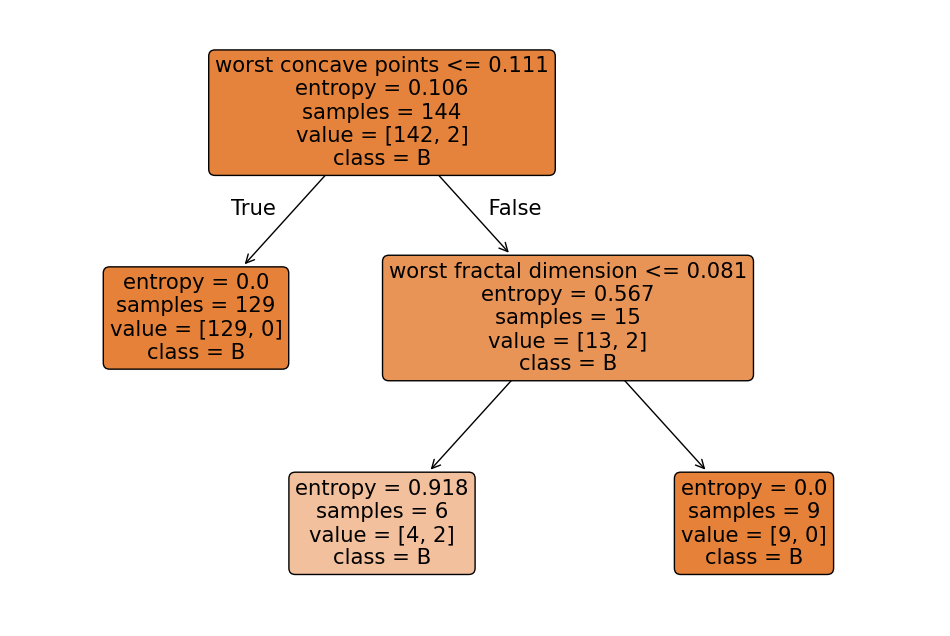

In [674]:
plt.figure(figsize=(12, 8))
plot_tree(best_DTree, feature_names=X_train.columns, class_names=dtree.classes_, filled=True, rounded=True)
plt.show()

In [676]:
# Here, as provided by the grid_searchCV, the max depth of this Decision tree is 2, and this is the decision tree that 
# gives the best result.

In [678]:
# So, on an average it can be concluded that for processed training data with no outliers, the Decision tree model gives 
# an accuracy score of 0.986, with maximum of 2 depth to prevent overfitting.